Name: Vibin Ravikumar  Batch ID: DSWDMCOP 260422H

# FEDEX DATASET
Using the fedex dataset to apply EDA, Feature Engineering, Data Visualization, Unsupervised Learning and finally Supervised Learning and also take the categorical variables and perform wordcloud. 

## DATA DICTIONARY

| **slno** |  **Name of Feature**  | **Description**                                                                                                                                                                                                                                            | **Type** | **Relevance** |
|:--------:|:---------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------:|:-------------:|
| 1        | Year                  | The Year the data was collected                                                                                                                                                                                                                            | Nominal  | Irrelevant    |
| 2        | Month                 | The Month in which the data was collected                                                                                                                                                                                                                  | Interval | Relevant      |
| 3        | DayofMonth            | The day of the month                                                                                                                                                                                                                                       | Interval | Relevant      |
| 4        | DayofWeek             | The day of Week                                                                                                                                                                                                                                            | Interval | Relevant      |
| 5        | Actual_Shipment_Time  | The Actual time when the package was sent for shipment. (ex: 1955 means 19 hours and 55 minutes i.e 7:55 PM)                                                                                                                                               | Interval | Relevant      |
| 6        | Planned_Shipment_Time | The time when the package should have been sent for shipment. (ex: 1955 means 19 hours and 55 minutes i.e 7:55 PM)                                                                                                                                         | Interval | Relevant      |
| 7        | Planned_Delivery_Time | The time when the package should be delivered. (ex: 1955 means 19 hours and 55 minutes i.e 7:55 PM)                                                                                                                                                        | Interval | Relevant      |
| 8        | Carrier_Name          | The name of the Carrier which carried the package.                                                                                                                                                                                                         | Nominal  | Relevant      |
| 9        | Carrier_Num           | The number of the Carrier which carried the package.                                                                                                                                                                                                       | Nominal  | Relevant      |
| 10       | Planned_TimeofTravel  | The estimated time to reach from Source to Destination. ( in minutes)                                                                                                                                                                                      | Ratio    | Relevant      |
| 11       | Shipment_Delay        | The time by which the package was shipped late. (in minutes. Negative value indicates that the package was shipped early. Ex: 4 indicates that the package was shipped 4 minutes late, whereas, -4 indicates that the package was shipped 4 minutes early) | Ratio    | Relevant      |
| 12       | Source                | The place from which the package was shipped.                                                                                                                                                                                                              | Nominal  | Relevant      |
| 13       | Destination           | The place at which the package was delivered.                                                                                                                                                                                                              | Nominal  | Relevant      |
| 14       | Distance              | Distance between Source and Destination in miles.                                                                                                                                                                                                          | Ratio    | Relevant      |
| 15       | Delivery_Status       | Whether it got delivered at right time or not. (Dependent Variable)                                                                                                                                                                                        | Binary   | Relevant      |

__LOADING THE DATASET__

Importing the required libraries. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

Loading the dataset using the pandas library.

In [2]:
df=pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass17\fedex.csv")
df.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(3604175, 15)

In [4]:
df.dtypes

Year                       int64
Month                      int64
DayofMonth                 int64
DayOfWeek                  int64
Actual_Shipment_Time     float64
Planned_Shipment_Time      int64
Planned_Delivery_Time      int64
Carrier_Name              object
Carrier_Num                int64
Planned_TimeofTravel     float64
Shipment_Delay           float64
Source                    object
Destination               object
Distance                   int64
Delivery_Status          float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status
count,3604175.0,3.604175e+06,3.604175e+06,3.604175e+06,3.522573e+06,3.604175e+06,3.604175e+06,3.604175e+06,3.603628e+06,3.522573e+06,3.604175e+06,3.522573e+06
mean,2008.0,3.514942e+00,1.568481e+01,3.934604e+00,1.338455e+03,1.329371e+03,1.495305e+03,2.223795e+03,1.291603e+02,1.115893e+01,7.280915e+02,2.038890e-01
std,0.0,1.709912e+00,8.763332e+00,1.987126e+00,4.814053e+02,4.664365e+02,4.854825e+02,1.944583e+03,6.951011e+01,3.618888e+01,5.611318e+02,4.028875e-01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-2.500000e+01,-9.200000e+01,1.100000e+01,0.000000e+00
25%,2008.0,2.000000e+00,8.000000e+00,2.000000e+00,9.290000e+02,9.250000e+02,1.115000e+03,6.160000e+02,8.000000e+01,-4.000000e+00,3.250000e+02,0.000000e+00
50%,2008.0,4.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.321000e+03,1.519000e+03,1.573000e+03,1.110000e+02,-1.000000e+00,5.830000e+02,0.000000e+00
75%,2008.0,5.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.910000e+03,3.602000e+03,1.600000e+02,1.000000e+01,9.570000e+02,0.000000e+00
max,2008.0,6.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,9.741000e+03,1.435000e+03,2.467000e+03,4.962000e+03,1.000000e+00


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  4


Removing the duplicates from the dataset keeping the first instance of the entry.

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Checking the number of missing values. 

In [9]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Actual_Shipment_Time     81602
Shipment_Delay           81602
Delivery_Status          81602
Planned_TimeofTravel       547
Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
Planned_Shipment_Time        0
Planned_Delivery_Time        0
Carrier_Name                 0
Carrier_Num                  0
Source                       0
Destination                  0
Distance                     0
dtype: int64


Removing all the Nan values as it is a small number of records. 

In [10]:
df.dropna(inplace=True)

Checking the number of unique values of each variable.

In [11]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Year                        1
Month                       6
DayofMonth                 31
DayOfWeek                   7
Actual_Shipment_Time     1439
Planned_Shipment_Time    1187
Planned_Delivery_Time    1350
Carrier_Name               20
Carrier_Num              7338
Planned_TimeofTravel      498
Shipment_Delay            997
Source                    297
Destination               299
Distance                 1420
Delivery_Status             2
dtype: int64


As some of the rows were removed there are some values missing in the index so reseting the index.

In [12]:
df.reset_index(inplace=True)
df.head(10)

,index,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0
5,5,2008,1,3,4,1940.0,1915,2110,WN,378,115.0,25.0,IND,JAX,688,1.0
6,6,2008,1,3,4,1937.0,1830,1940,WN,509,250.0,67.0,IND,LAS,1591,1.0
7,7,2008,1,3,4,1039.0,1040,1150,WN,535,250.0,-1.0,IND,LAS,1591,0.0
8,8,2008,1,3,4,617.0,615,650,WN,11,95.0,2.0,IND,MCI,451,0.0
9,9,2008,1,3,4,1620.0,1620,1655,WN,810,95.0,0.0,IND,MCI,451,0.0


Removing the columns which are not required as they are not useful for analysis.

In [13]:
df.drop(['Year','index'],axis=1,inplace=True)
df.head(5)

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [14]:
df[['Planned_TimeofTravel','Shipment_Delay','Distance']].mean()

Planned_TimeofTravel    129.505781
Shipment_Delay           11.158186
Distance                731.615036
dtype: float64

In [15]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_19220\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Month                       4.0
DayofMonth                 16.0
DayOfWeek                   4.0
Actual_Shipment_Time     1329.0
Planned_Shipment_Time    1320.0
Planned_Delivery_Time    1517.0
Carrier_Num              1562.0
Planned_TimeofTravel      111.0
Shipment_Delay             -1.0
Distance                  585.0
Delivery_Status             0.0
dtype: float64

In [16]:
df.mode()

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,5,20,4,555.0,600,1930,WN,16,75.0,0.0,ATL,ATL,337,0.0


### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [17]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_19220\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Month                    2.921870e+00
DayofMonth               7.673194e+01
DayOfWeek                3.953407e+00
Actual_Shipment_Time     2.317488e+05
Planned_Shipment_Time    2.177398e+05
Planned_Delivery_Time    2.358514e+05
Carrier_Num              3.751298e+06
Planned_TimeofTravel     4.864158e+03
Shipment_Delay           1.309622e+03
Distance                 3.170118e+05
Delivery_Status          1.623119e-01
dtype: float64

In [18]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_19220\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Month                       1.709348
DayofMonth                  8.759677
DayOfWeek                   1.988318
Actual_Shipment_Time      481.402973
Planned_Shipment_Time     466.625981
Planned_Delivery_Time     485.645393
Carrier_Num              1936.826751
Planned_TimeofTravel       69.743514
Shipment_Delay             36.188693
Distance                  563.037978
Delivery_Status             0.402879
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [19]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_19220\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Month                   -0.028982
DayofMonth               0.000623
DayOfWeek                0.045562
Actual_Shipment_Time     0.043858
Planned_Shipment_Time    0.086629
Planned_Delivery_Time   -0.204917
Carrier_Num              0.906269
Planned_TimeofTravel     1.493550
Shipment_Delay           6.257128
Distance                 1.622148
Delivery_Status          1.470028
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [20]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_19220\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Month                    -1.263104
DayofMonth               -1.192774
DayOfWeek                -1.215264
Actual_Shipment_Time     -0.985367
Planned_Shipment_Time    -1.045884
Planned_Delivery_Time    -0.602298
Carrier_Num              -0.217094
Planned_TimeofTravel      2.735711
Shipment_Delay           96.077752
Distance                  3.273434
Delivery_Status           0.160982
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_19220\1285565701.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


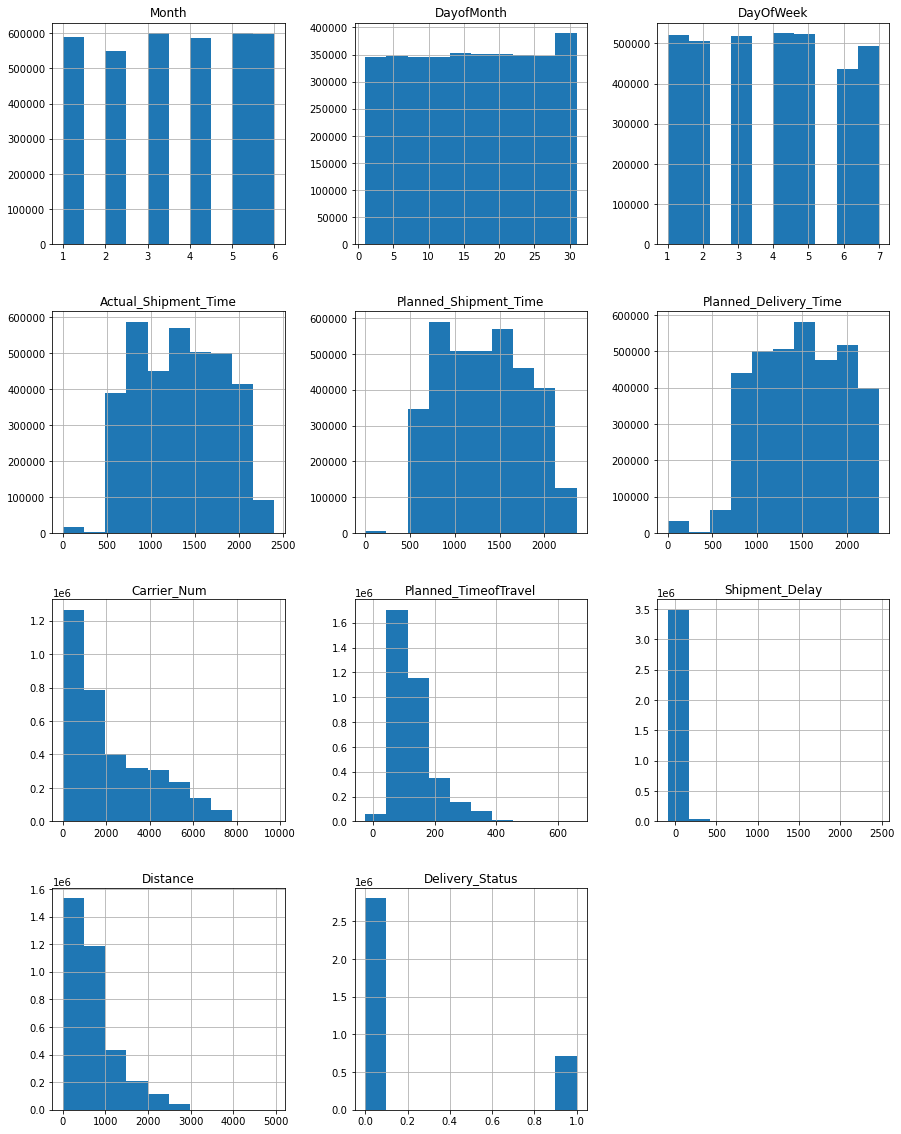

In [21]:
fig=plt.figure(figsize=(15,20))
ax=fig.gca()
df.hist(ax=ax)
plt.show()

In [22]:
df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Carrier_Num', 'Planned_TimeofTravel', 'Shipment_Delay', 'Source',
       'Destination', 'Distance', 'Delivery_Status'],
      dtype='object')

### BIVARIATE ANALYSIS
Plotting scatter plots.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


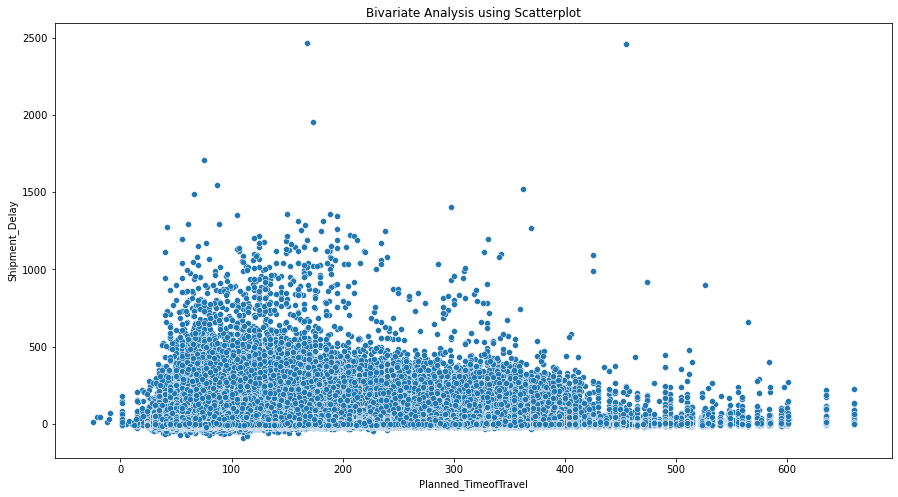

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['Planned_TimeofTravel'],df['Shipment_Delay'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


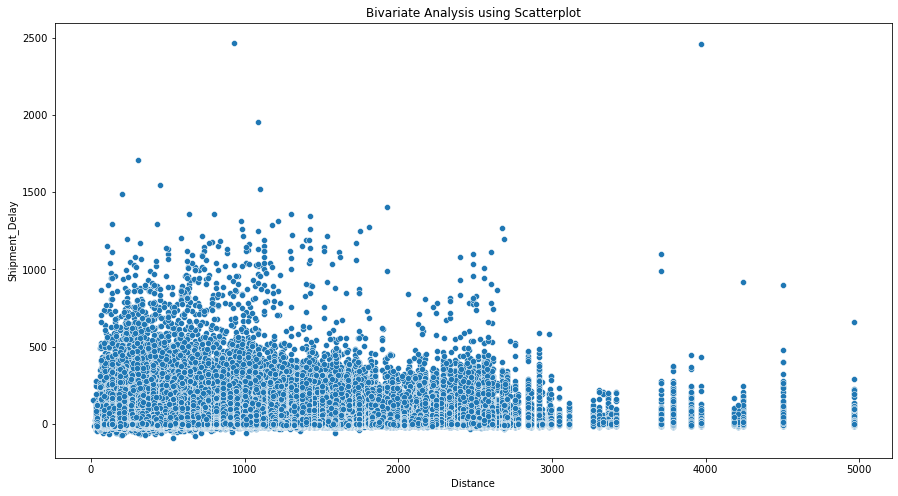

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['Distance'],df['Shipment_Delay'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting Boxplots of relevant variables. 

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Planned_TimeofTravel'>

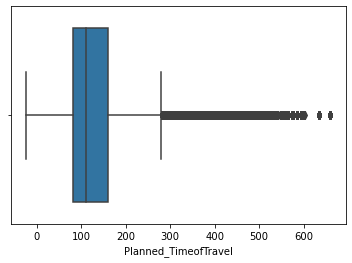

In [25]:
sns.boxplot(df['Planned_TimeofTravel'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shipment_Delay'>

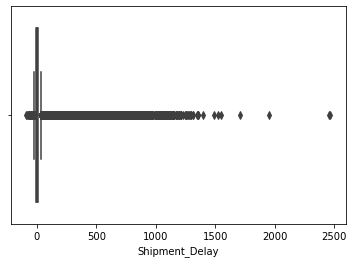

In [26]:
sns.boxplot(df['Shipment_Delay'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance'>

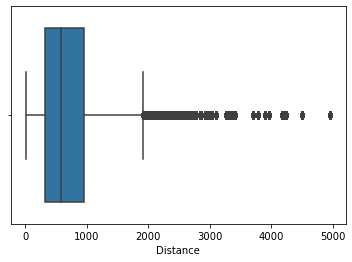

In [27]:
sns.boxplot(df['Distance'])

Checking the number of outliers in the relevant variables using a custom function. 

In [28]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [29]:
sum(outlier_func(df['Planned_TimeofTravel']))

165340

In [30]:
sum(outlier_func(df['Shipment_Delay']))

445482

In [31]:
sum(outlier_func(df['Distance']))

185304

From above it is clear that there are a large number of outliers so replacing the outliers using winsorization. 

In [32]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Planned_TimeofTravel'])
df['Planned_TimeofTravel']=winsor.fit_transform(df[['Planned_TimeofTravel']])
sum(outlier_func(df['Planned_TimeofTravel']))

0

In [33]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Shipment_Delay'])
df['Shipment_Delay']=winsor.fit_transform(df[['Shipment_Delay']])
sum(outlier_func(df['Shipment_Delay']))

0

In [34]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Distance'])
df['Distance']=winsor.fit_transform(df[['Distance']])
sum(outlier_func(df['Distance']))

0

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Planned_TimeofTravel'>

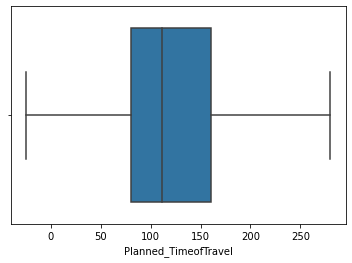

In [35]:
sns.boxplot(df['Planned_TimeofTravel'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shipment_Delay'>

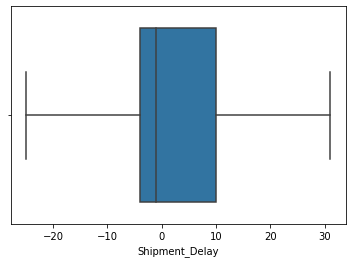

In [36]:
sns.boxplot(df['Shipment_Delay'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance'>

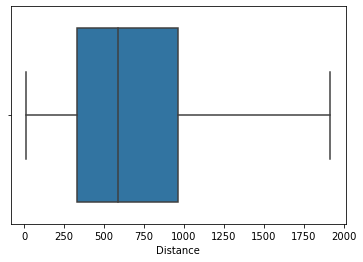

In [37]:
sns.boxplot(df['Distance'])

### STRATIFIED RANDOM SAMPLING
Stratifying the dependent variable and considering only 20 percent of the total data as the dataset is too huge to carry out model building.

In [38]:
df_sample=df.groupby('Delivery_Status', group_keys=False).apply(lambda x: x.sample(frac=0.2))

Reseting the index of the sample data. 

In [39]:
df_sample.reset_index(inplace=True)
df_sample.drop(['index'],axis=1,inplace=True)
df_sample.head()

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,6,22,7,1143.0,1150,1450,AA,806,120.0,-7.0,DEN,DFW,641.0,0.0
1,1,18,5,1755.0,1755,1942,US,92,167.0,0.0,PHX,PDX,1009.0,0.0
2,6,30,1,856.0,901,1010,9E,2905,69.0,-5.0,DTW,TVC,207.0,0.0
3,1,15,2,1517.0,1525,1822,NW,706,117.0,-8.0,MSP,CLE,622.0,0.0
4,3,21,5,940.0,940,1203,EV,4344,83.0,0.0,PFN,ATL,247.0,0.0


### ONE HOT ENCODING
One Hot encoding the nominal variables of the sample dataset using the sklearn library. 

In [40]:
encoder=OneHotEncoder()
enc_df=pd.DataFrame(encoder.fit_transform(df_sample[['Carrier_Name','Source','Destination']]).toarray())
enc_df.columns=encoder.get_feature_names_out()
enc_df.head()

,Carrier_Name_9E,Carrier_Name_AA,Carrier_Name_AQ,Carrier_Name_AS,Carrier_Name_B6,Carrier_Name_CO,Carrier_Name_DL,Carrier_Name_EV,Carrier_Name_F9,Carrier_Name_FL,...,Destination_TYR,Destination_TYS,Destination_VLD,Destination_VPS,Destination_WRG,Destination_WYS,Destination_XNA,Destination_YAK,Destination_YKM,Destination_YUM
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Joining the one hot encoded values to the sample dataset. 

In [41]:
df_sample=df_sample.join(enc_df)
df_sample.head()

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,...,Destination_TYR,Destination_TYS,Destination_VLD,Destination_VPS,Destination_WRG,Destination_WYS,Destination_XNA,Destination_YAK,Destination_YKM,Destination_YUM
0,6,22,7,1143.0,1150,1450,AA,806,120.0,-7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,18,5,1755.0,1755,1942,US,92,167.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,30,1,856.0,901,1010,9E,2905,69.0,-5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,15,2,1517.0,1525,1822,NW,706,117.0,-8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,21,5,940.0,940,1203,EV,4344,83.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dropping the original columns of the already one hot encoded variables. 

In [42]:
df_sample.drop(['Carrier_Name','Source','Destination'],axis=1,inplace=True)

Splitting the dataset into Independent (X) and Dependent (Y) dataframes. 

In [43]:
X=df_sample.drop(['Delivery_Status'],axis=1)
Y=df_sample['Delivery_Status']

### SCALING
Using the Robust scaler to scale the sample dataset. 

Loading the X dataset column names to cols

In [44]:
cols=X.columns

Creating the scaler object to fit and transform the X dataset.

In [45]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=[cols])
X.head()

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,...,Destination_TYR,Destination_TYS,Destination_VLD,Destination_VPS,Destination_WRG,Destination_WYS,Destination_XNA,Destination_YAK,Destination_YKM,Destination_YUM
0,0.666667,0.400000,0.75,-0.231056,-0.213836,-0.084277,-0.255405,0.1000,-0.428571,0.088608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.000000,0.133333,0.25,0.529193,0.547170,0.534591,-0.496622,0.6875,0.071429,0.670886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.666667,0.933333,-0.75,-0.587578,-0.527044,-0.637736,0.453716,-0.5375,-0.285714,-0.598101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.000000,-0.066667,-0.50,0.233540,0.257862,0.383648,-0.289189,0.0625,-0.500000,0.058544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.333333,0.333333,0.25,-0.483230,-0.477987,-0.394969,0.939865,-0.3625,0.071429,-0.534810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### UNSUPERVISED LEARNING USING DIMENSION REDUCTION 
As the dataset has a high number of columns after one hot encoding using dimension reduction using PCA. 

Loading function PCA to carry out dimension reduction , creating the pca object and saving the variance values to var and storing the percentage of data left to var1. 

In [46]:
from sklearn.decomposition import PCA
pca=PCA(n_components=35)
pca_values=pca.fit_transform(X)
var=pca.explained_variance_ratio_
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([17.71, 33.03, 42.36, 47.72, 52.34, 56.75, 60.1 , 62.17, 63.56,
       64.9 , 66.11, 67.18, 68.21, 69.19, 70.09, 70.93, 71.71, 72.41,
       73.06, 73.71, 74.29, 74.85, 75.38, 75.91, 76.43, 76.92, 77.38,
       77.82, 78.25, 78.66, 79.06, 79.43, 79.79, 80.13, 80.47])

Plotting the Variance plot for the PCA components obtained

Text(0, 0.5, 'Percentage of Data')

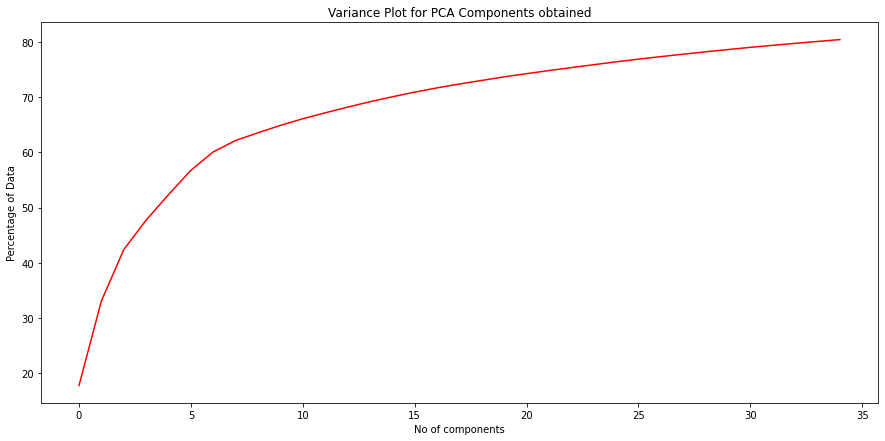

In [47]:
plt.figure(figsize=(15,7))
plt.plot(var1,color='red')
plt.title("Variance Plot for PCA Components obtained")
plt.xlabel("No of components")
plt.ylabel("Percentage of Data")

Storing the pca_values as a dataframe. 

In [48]:
X_pca=pd.DataFrame(pca_values)
X_pca.head(3)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.099612,0.752518,-0.491906,-0.407312,0.302468,-0.872472,0.772502,-0.369286,-0.722470,0.467198,...,-0.089165,-0.553801,-0.109589,-0.324730,0.125225,-0.055650,0.121639,-0.009198,-0.022674,-0.028168
1,0.940127,-0.352967,-0.910162,-0.485280,0.173996,0.821434,0.299980,-0.147406,0.105657,0.045972,...,0.017574,0.063055,0.255997,0.119183,0.128368,-0.610781,-0.172831,0.049064,-0.335232,-0.343745
2,-1.343489,0.993765,0.077422,-0.011867,0.928571,-0.847935,-0.684105,-0.156955,0.032916,-0.003647,...,0.258897,0.000592,-0.001749,0.027242,0.056817,0.019518,-0.005263,-0.047163,-0.031020,-0.140182


### MODEL BUILDING

Using the train test split function to split the data set into train and test datasets for both independent and Dependent variables. 

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size = 0.2, random_state = 0,stratify=Y)

__DECISION TREE CLASSIFICATION__

Loading the libraries required for classification model and the accuracy score. 

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier as DT

Creating the classification object and training it on the train dataset. 

In [51]:
model = DT(criterion='entropy',random_state=0) 
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Evaluating the test dataset and predicting. 

In [52]:
pred=model.predict(X_test)

The accuracy score of the predicted test data. 

In [53]:
accuracy_score(Y_test,pred)


0.9962097283638661

In [54]:
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,0.0,1.0
Actual,,
0.0,111936,227
1.0,307,28417


Evaluating the train data and the accuracy score of the train data. 

In [55]:
preds=model.predict(X_train)
accuracy_score(Y_train,preds)

1.0

In [56]:
pd.crosstab(Y_train, preds, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,0.0,1.0
Actual,,
0.0,448651,0
1.0,0,114894


__GAUSSIAN NAIVE BAYES__

Importing the library for Gaussian Naive Bayes. 

In [57]:
from sklearn.naive_bayes import GaussianNB

Creating the classification object and training it on the train data. 

In [58]:
gnb=GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

Evaluating the test data. 

In [59]:
Y_pred = gnb.predict(X_test)

Accuracy score of the test data.

In [60]:
accuracy_score(Y_pred,Y_test)

0.9673710136492366

In [66]:
pd.crosstab(Y_test,Y_pred, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,0.0,1.0
Actual,,
0.0,111033,1130
1.0,3467,25257


Evaluating the train data. 

In [61]:
Y_pred1=gnb.predict(X_train)

Accuracy of the train data.

In [62]:
accuracy_score(Y_pred1,Y_train)

0.9682988936109805

In [67]:
pd.crosstab(Y_train,Y_pred1, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,0.0,1.0
Actual,,
0.0,444363,4288
1.0,13577,101317


### WORDCLOUD OF SOURCE , DESTINATION AND CARRIER NAME COLUMNS. 

In [69]:
from wordcloud import WordCloud

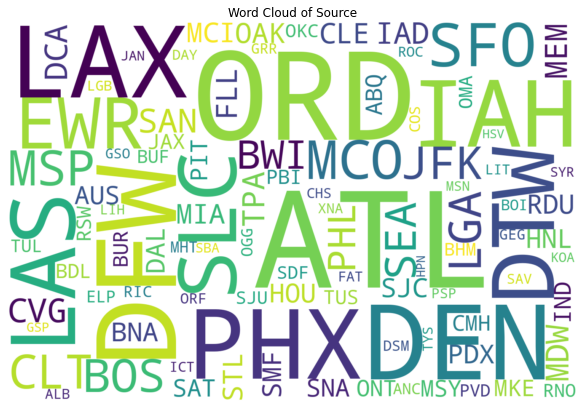

In [71]:
data = df['Source'].value_counts().to_dict()
WC_height = 1000
WC_width = 1500
WC_max_words = 100
wordCloud = WordCloud(background_color='White',max_words=WC_max_words, height=WC_height, width=WC_width)

wordCloud.generate_from_frequencies(data)
plt.figure(figsize=(15,7))
plt.title('Word Cloud of Source')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The source codes of ATL, ORD, LAX, DFW, PHX, DEN etc are some of the most frequently used source codes. 

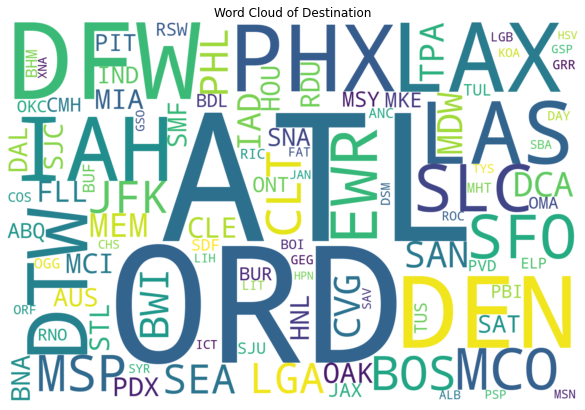

In [73]:
data = df['Destination'].value_counts().to_dict()
WC_height = 1000
WC_width = 1500
WC_max_words = 100
wordCloud = WordCloud(background_color='White',max_words=WC_max_words, height=WC_height, width=WC_width)

wordCloud.generate_from_frequencies(data)
plt.figure(figsize=(15,7))
plt.title('Word Cloud of Destination')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The destination codes of ATL, ORD, DFW, DEN, PHX, LAX etc are the most frequently used destination codes. 

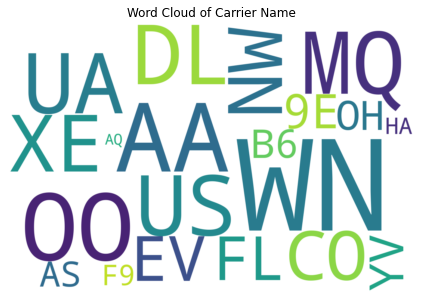

In [76]:
data = df['Carrier_Name'].value_counts().to_dict()
WC_height = 1000
WC_width = 1500
WC_max_words = 100
wordCloud = WordCloud(background_color='White',max_words=WC_max_words, height=WC_height, width=WC_width)

wordCloud.generate_from_frequencies(data)
plt.figure(figsize=(10,5))
plt.title('Word Cloud of Carrier Name')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

WN is the most commonly used carrier for the fedex transactions. 